# OpenGauss 与 PostgreSQL 之间的差异

## 大批量插入数据 bulk_insert

### 表格数量

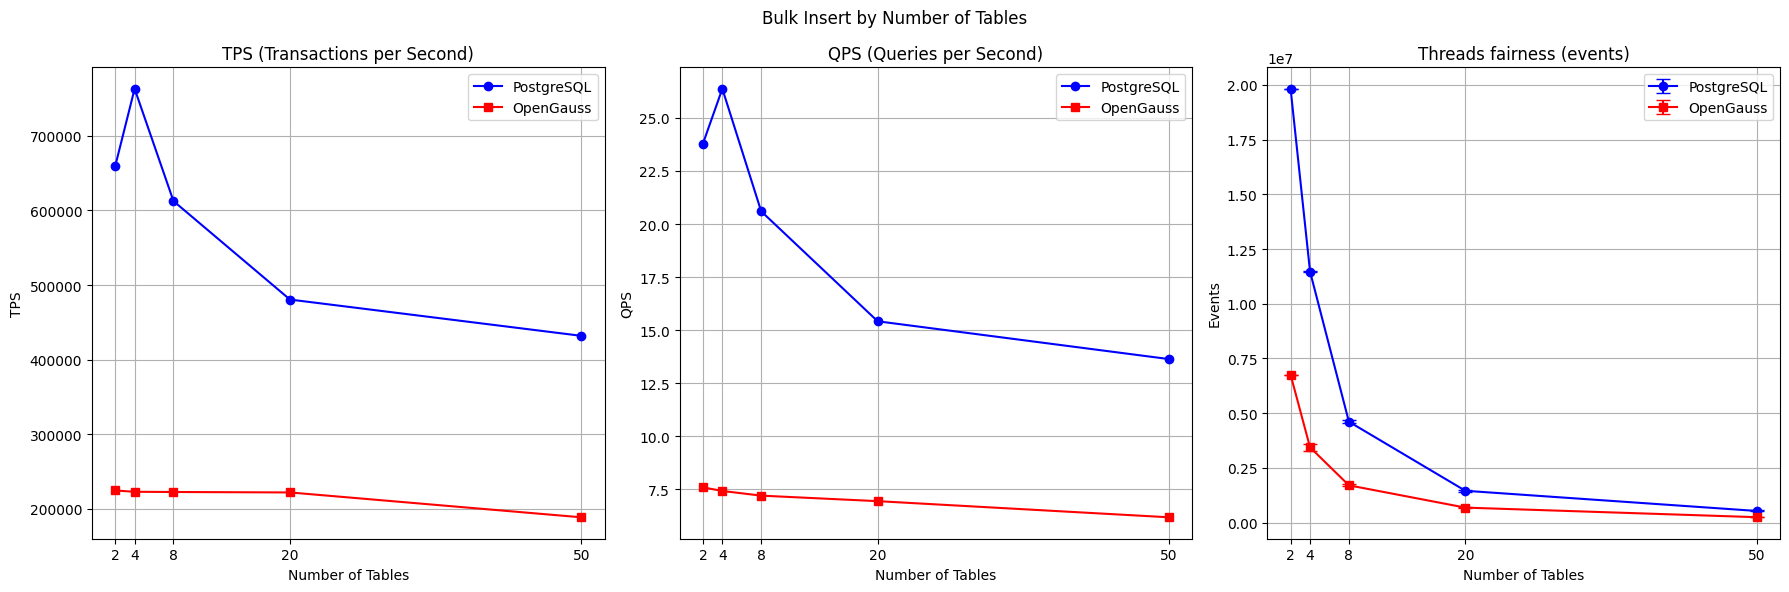

In [44]:
import matplotlib.pyplot as plt

# 假设我们有以下数据
tables = [2, 4, 8, 20, 50]
postgresql_tps = [659464.89, 763314.49, 612629.53, 480507.11, 431853.93]
postgresql_qps = [23.78, 26.37, 20.60, 15.42, 13.64]
postgresql_threads_events = [19813925.5000, 11471638.2500, 4608717.0000, 1450124.3000, 528084.7800]
postgresql_threads_events_stddev = [13106.50, 21734.67, 60042.73, 45542.52, 23813.55]

opengauss_tps = [224362.29, 222627.43, 222341.15, 221734.76, 188394.17]
opengauss_qps = [7.60, 7.43, 7.21, 6.95, 6.19]
opengauss_threads_events = [6749404.5000, 3436435.7500, 1699857.6250, 680677.1000, 243542.4600]
opengauss_threads_events_stddev = [14562, 170294, 39714.53, 15628.39, 5292.16]

# 创建一个图形对象，并设置大小
plt.figure(figsize=(18, 6))
plt.suptitle('Bulk Insert by Number of Tables')

# 第一个子图：TPS
plt.subplot(1, 3, 1)
plt.errorbar(tables, postgresql_tps, marker='o', label='PostgreSQL', color='b', capsize=5)
plt.errorbar(tables, opengauss_tps, marker='s', label='OpenGauss', color='r', capsize=5)
plt.title('TPS (Transactions per Second)')
plt.xlabel('Number of Tables')
plt.ylabel('TPS')
plt.legend()
plt.grid(True)
plt.xticks(tables)

# 第二个子图：QPS
plt.subplot(1, 3, 2)
plt.plot(tables, postgresql_qps, marker='o', label='PostgreSQL', color='b')
plt.plot(tables, opengauss_qps, marker='s', label='OpenGauss', color='r')
plt.title('QPS (Queries per Second)')
plt.xlabel('Number of Tables')
plt.ylabel('QPS')
plt.legend()
plt.grid(True)
plt.xticks(tables)

# 第三个子图：Threads fairness (events)
plt.subplot(1, 3, 3)
plt.errorbar(tables, postgresql_threads_events, yerr=postgresql_threads_events_stddev, marker='o', label='PostgreSQL', color='b', capsize=5)
plt.errorbar(tables, opengauss_threads_events, yerr=opengauss_threads_events_stddev, marker='s', label='OpenGauss', color='r', capsize=5)
plt.title('Threads fairness (events)')
plt.xlabel('Number of Tables')
plt.ylabel('Events')
plt.legend()
plt.grid(True)
plt.xticks(tables)

# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()

## OLTP Update by index


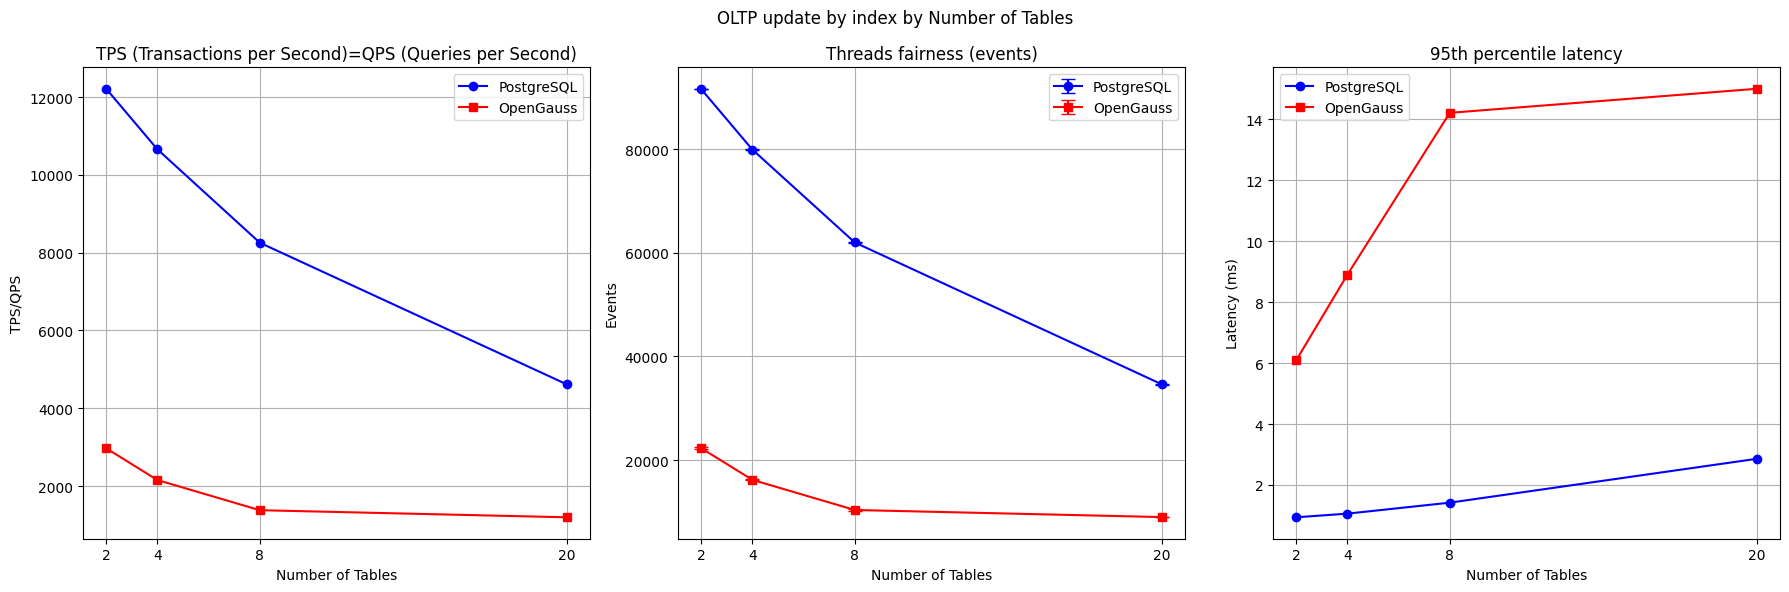

In [45]:

tables = [2, 4, 8, 20]
postgresql_tps = [12213.17,10656.40,8256.08 ,4612.65]
postgresql_qps = [12213.17,10656.40,8256.08 ,4612.65]
postgresql_95latency = [0.94,1.06,1.42,2.86]
postgresql_threads_events = [91622.3750,79945.6250,62011.7500,34606.6250]
postgresql_threads_events_stddev = [71.36,55.17,88.96,51.01]


opengauss_tps = [2971.03 ,2155.52,1379.96 ,1197.56]
opengauss_qps = [2971.03 ,2155.52,1379.96 ,1197.56]
opengauss_95latency = [6.09,8.90,14.21,15.00]
opengauss_threads_events = [22290.8750,16172.7500,10352.7500,8984.1250]
opengauss_threads_events_stddev = [194.92,89.44,107.89,40.85]

# 创建一个图形对象，并设置大小
plt.figure(figsize=(18, 6))
plt.suptitle('OLTP update by index by Number of Tables')

# 第一个子图：TPS
plt.subplot(1, 3, 1)
plt.errorbar(tables, postgresql_tps, marker='o', label='PostgreSQL', color='b', capsize=5)
plt.errorbar(tables, opengauss_tps, marker='s', label='OpenGauss', color='r', capsize=5)
plt.title('TPS (Transactions per Second)=QPS (Queries per Second)')
plt.xlabel('Number of Tables')
plt.ylabel('TPS/QPS')
plt.legend()
plt.grid(True)
plt.xticks(tables)

# 第二个子图：QPS
# plt.subplot(1, , 2)
# plt.plot(tables, postgresql_qps, marker='o', label='PostgreSQL', color='b')
# plt.plot(tables, opengauss_qps, marker='s', label='OpenGauss', color='r')
# plt.title('QPS (Queries per Second)')
# plt.xlabel('Number of Tables')
# plt.ylabel('QPS')
# plt.legend()
# plt.grid(True)
# plt.xticks(tables)

# 第三个子图：Threads fairness (events)
plt.subplot(1, 3, 2)
plt.errorbar(tables, postgresql_threads_events, yerr=postgresql_threads_events_stddev, marker='o', label='PostgreSQL', color='b', capsize=5)
plt.errorbar(tables, opengauss_threads_events, yerr=opengauss_threads_events_stddev, marker='s', label='OpenGauss', color='r', capsize=5)
plt.title('Threads fairness (events)')
plt.xlabel('Number of Tables')
plt.ylabel('Events')
plt.legend()
plt.grid(True)
plt.xticks(tables)

# 第四个子图：95th percentile latency
plt.subplot(1, 3, 3)
plt.plot(tables, postgresql_95latency, marker='o', label='PostgreSQL', color='b')
plt.plot(tables, opengauss_95latency, marker='s', label='OpenGauss', color='r')
plt.title('95th percentile latency')
plt.xlabel('Number of Tables')
plt.ylabel('Latency (ms)')
plt.legend()
plt.grid(True)
plt.xticks(tables)


# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()

## OLTP Delete 

```python
tables = [2, 4, 8, 20]
postgresql_tps = []
postgresql_qps = []
postgresql_95latency = []
postgresql_threads_events = []
postgresql_threads_events_stddev = []


opengauss_tps = []
opengauss_qps = []
opengauss_95latency = []
opengauss_threads_events = []
opengauss_threads_events_stddev = []
```

In [46]:
tables = [2, 4, 8, 20]
postgresql_tps = []
postgresql_qps = []
postgresql_95latency = []
postgresql_threads_events = []
postgresql_threads_events_stddev = []


opengauss_tps = []
opengauss_qps = []
opengauss_95latency = []
opengauss_threads_events = []
opengauss_threads_events_stddev = []

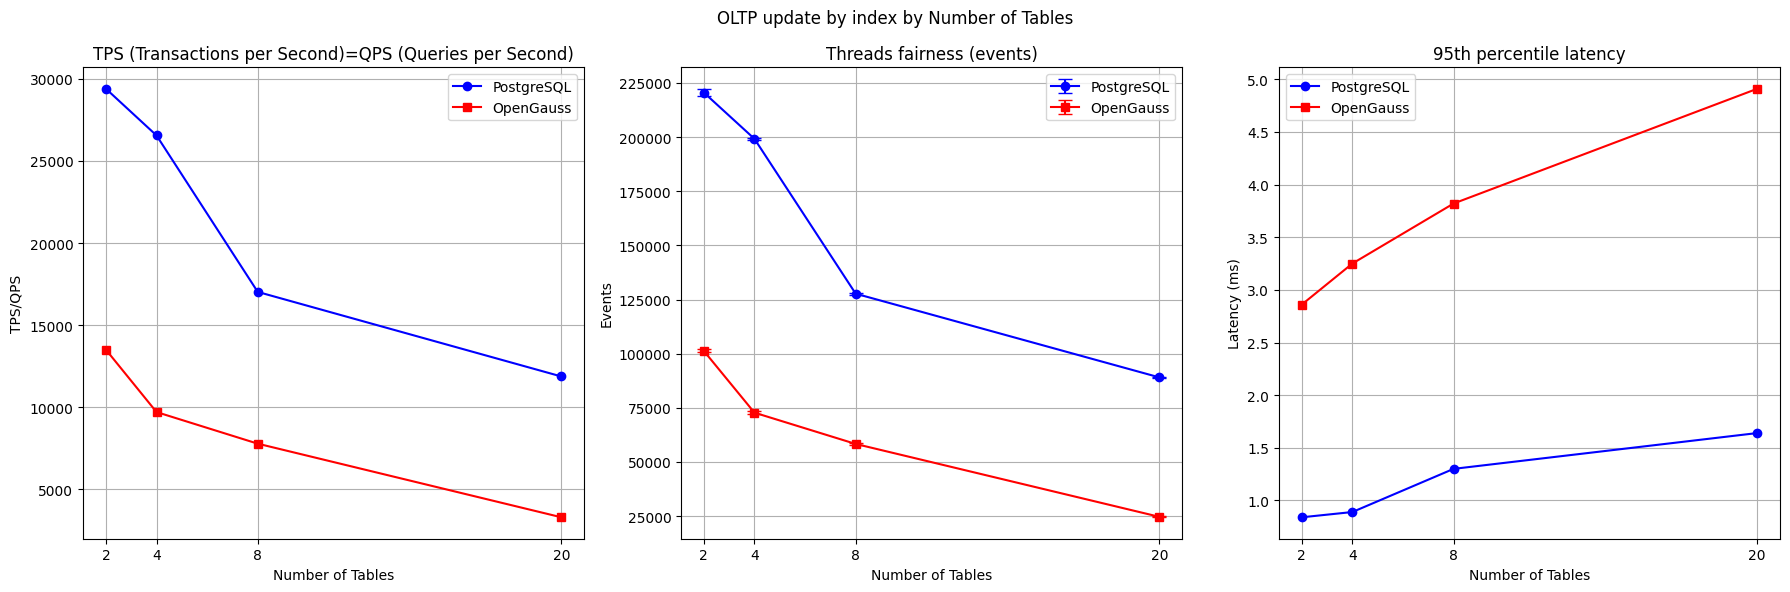

In [47]:
tables = [2, 4, 8, 20]
postgresql_tps = [29398.28,26552.47,17019.57,11866.76 ]
postgresql_qps = []
postgresql_95latency = [0.84,0.89,1.30,1.64]
postgresql_threads_events = [220564.7500,199198.2500,127695.0000,89044.6250]
postgresql_threads_events_stddev = [1756.40,604.56,400.09,249.37]


opengauss_tps = [13498.50,9698.55,7772.59,3286.90]
opengauss_qps = []
opengauss_95latency = [2.86,3.25,3.82,4.91]
opengauss_threads_events = [101258.1250,72751.3750,58310.6250,24658.7500]
opengauss_threads_events_stddev = [694.81,539.89,559.18,220.54]

# 创建一个图形对象，并设置大小
plt.figure(figsize=(18, 6))
plt.suptitle('OLTP update by index by Number of Tables')

# 第一个子图：TPS
plt.subplot(1, 3, 1)
plt.errorbar(tables, postgresql_tps, marker='o', label='PostgreSQL', color='b', capsize=5)
plt.errorbar(tables, opengauss_tps, marker='s', label='OpenGauss', color='r', capsize=5)
plt.title('TPS (Transactions per Second)=QPS (Queries per Second)')
plt.xlabel('Number of Tables')
plt.ylabel('TPS/QPS')
plt.legend()
plt.grid(True)
plt.xticks(tables)

# 第二个子图：QPS
# plt.subplot(1, , 2)
# plt.plot(tables, postgresql_qps, marker='o', label='PostgreSQL', color='b')
# plt.plot(tables, opengauss_qps, marker='s', label='OpenGauss', color='r')
# plt.title('QPS (Queries per Second)')
# plt.xlabel('Number of Tables')
# plt.ylabel('QPS')
# plt.legend()
# plt.grid(True)
# plt.xticks(tables)

# 第三个子图：Threads fairness (events)
plt.subplot(1, 3, 2)
plt.errorbar(tables, postgresql_threads_events, yerr=postgresql_threads_events_stddev, marker='o', label='PostgreSQL', color='b', capsize=5)
plt.errorbar(tables, opengauss_threads_events, yerr=opengauss_threads_events_stddev, marker='s', label='OpenGauss', color='r', capsize=5)
plt.title('Threads fairness (events)')
plt.xlabel('Number of Tables')
plt.ylabel('Events')
plt.legend()
plt.grid(True)
plt.xticks(tables)

# 第四个子图：95th percentile latency
plt.subplot(1, 3, 3)
plt.plot(tables, postgresql_95latency, marker='o', label='PostgreSQL', color='b')
plt.plot(tables, opengauss_95latency, marker='s', label='OpenGauss', color='r')
plt.title('95th percentile latency')
plt.xlabel('Number of Tables')
plt.ylabel('Latency (ms)')
plt.legend()
plt.grid(True)
plt.xticks(tables)


# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()

## OLTP read only


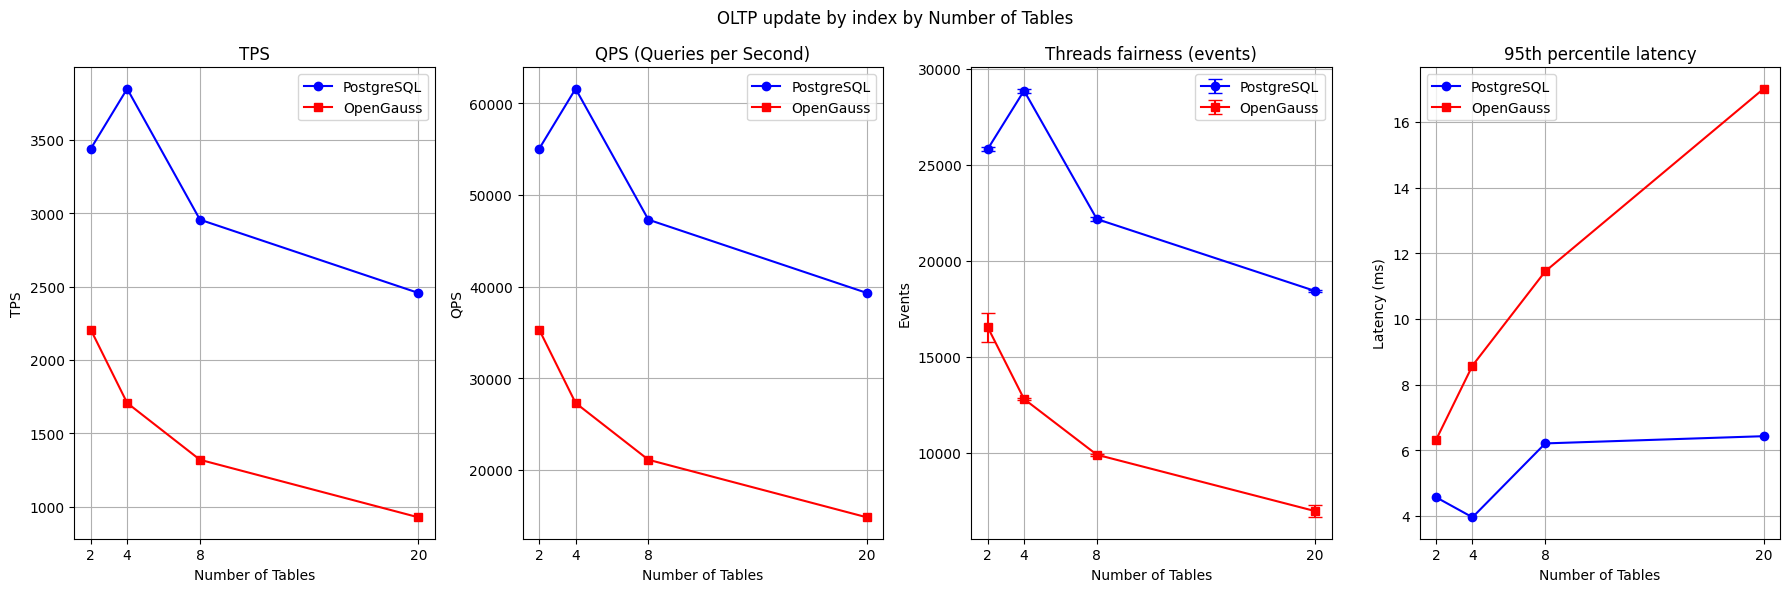

In [48]:
tables = [2, 4, 8, 20]
postgresql_tps = [3439.26 ,3847.92 ,2955.58,2456.43]
postgresql_qps = [55028.23,61566.70,47289.29,39302.85]
postgresql_95latency = [4.57,3.96,6.21,6.43]
postgresql_threads_events = [25820.6250,28868.8750,22177.8750,18426.8750]
postgresql_threads_events_stddev = [110.51,99.43,118.97,38.81]


opengauss_tps = [2205.69,1706.09 ,1319.14 ,926.99 ]
opengauss_qps = [35291.07 ,27297.41,21106.20,14831.83]
opengauss_95latency = [6.32,8.58,11.45,17.01]
opengauss_threads_events = [16548.8750,12798.7500,9896.1250,6956.0000]
opengauss_threads_events_stddev = [757.94,39.07,54.35,321.81]

# 创建一个图形对象，并设置大小
plt.figure(figsize=(18, 6))
plt.suptitle('OLTP update by index by Number of Tables')

# 第一个子图：TPS
plt.subplot(1, 4, 1)
plt.errorbar(tables, postgresql_tps, marker='o', label='PostgreSQL', color='b', capsize=5)
plt.errorbar(tables, opengauss_tps, marker='s', label='OpenGauss', color='r', capsize=5)
plt.title('TPS')
plt.xlabel('Number of Tables')
plt.ylabel('TPS')
plt.legend()
plt.grid(True)
plt.xticks(tables)

# 第二个子图：QPS
plt.subplot(1, 4, 2)
plt.plot(tables, postgresql_qps, marker='o', label='PostgreSQL', color='b')
plt.plot(tables, opengauss_qps, marker='s', label='OpenGauss', color='r')
plt.title('QPS (Queries per Second)')
plt.xlabel('Number of Tables')
plt.ylabel('QPS')
plt.legend()
plt.grid(True)
plt.xticks(tables)

# 第三个子图：Threads fairness (events)
plt.subplot(1, 4, 3)
plt.errorbar(tables, postgresql_threads_events, yerr=postgresql_threads_events_stddev, marker='o', label='PostgreSQL', color='b', capsize=5)
plt.errorbar(tables, opengauss_threads_events, yerr=opengauss_threads_events_stddev, marker='s', label='OpenGauss', color='r', capsize=5)
plt.title('Threads fairness (events)')
plt.xlabel('Number of Tables')
plt.ylabel('Events')
plt.legend()
plt.grid(True)
plt.xticks(tables)

# 第四个子图：95th percentile latency
plt.subplot(1, 4, 4)
plt.plot(tables, postgresql_95latency, marker='o', label='PostgreSQL', color='b')
plt.plot(tables, opengauss_95latency, marker='s', label='OpenGauss', color='r')
plt.title('95th percentile latency')
plt.xlabel('Number of Tables')
plt.ylabel('Latency (ms)')
plt.legend()
plt.grid(True)
plt.xticks(tables)


# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()

## OLTP write only

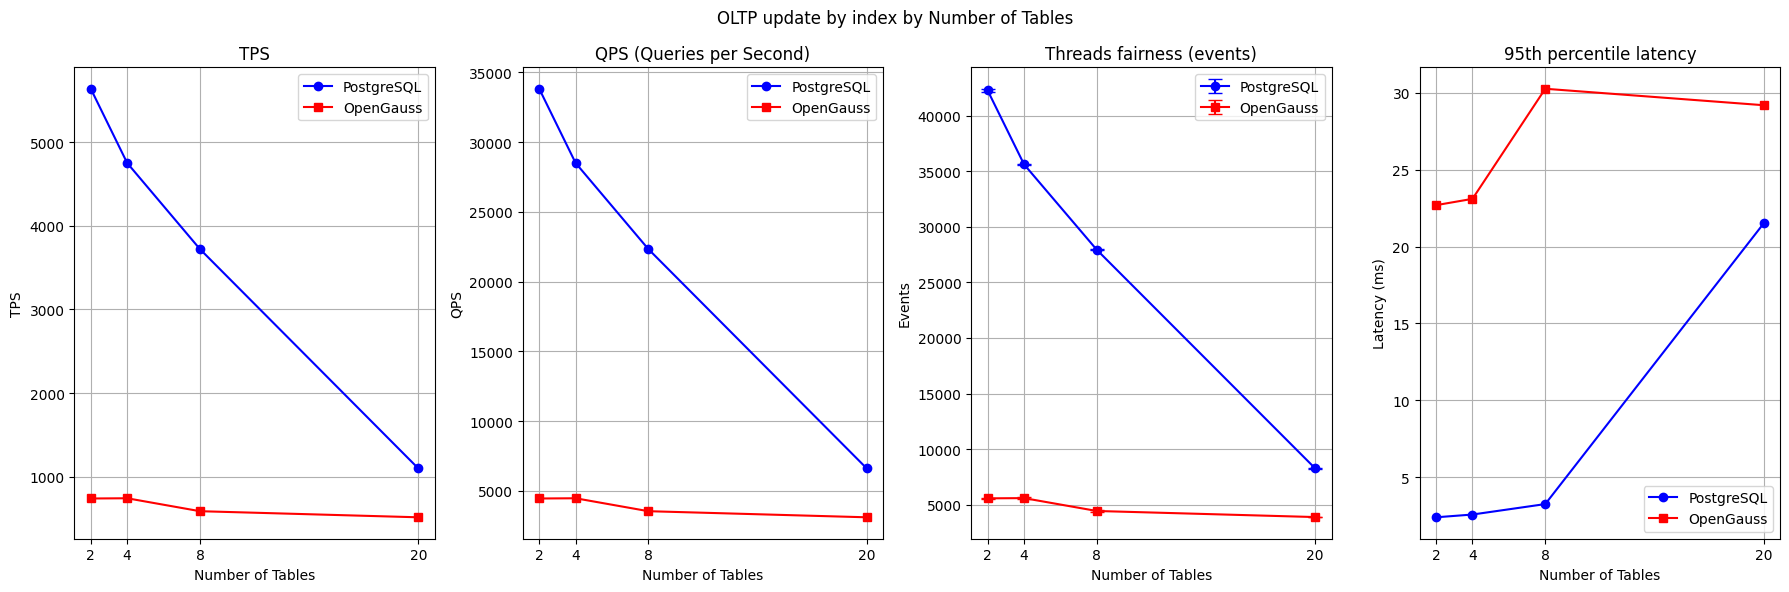

In [49]:
tables = [2, 4, 8, 20]
postgresql_tps = [5636.68,4749.85,3720.80,1100.67 ]
postgresql_qps = [33823.55,28500.65,22325.22,6604.01]
postgresql_95latency = [2.39,2.57,3.25,21.50]
postgresql_threads_events = [42285.3750,35629.6250,27935.6250,8258.6250]
postgresql_threads_events_stddev = [152.78,55.98,41.17,30.48]


opengauss_tps = [741.37,744.15 ,589.62 ,516.77 ]
opengauss_qps = [4448.42,4464.93,3537.79,3100.60]
opengauss_95latency = [22.69,23.10,30.26,29.19]
opengauss_threads_events = [5562.2500,5582.6250,4423.8750,3877.2500]
opengauss_threads_events_stddev = [39.59,61.92,49.95,21.42]


# 创建一个图形对象，并设置大小
plt.figure(figsize=(18, 6))
plt.suptitle('OLTP update by index by Number of Tables')

# 第一个子图：TPS
plt.subplot(1, 4, 1)
plt.errorbar(tables, postgresql_tps, marker='o', label='PostgreSQL', color='b', capsize=5)
plt.errorbar(tables, opengauss_tps, marker='s', label='OpenGauss', color='r', capsize=5)
plt.title('TPS')
plt.xlabel('Number of Tables')
plt.ylabel('TPS')
plt.legend()
plt.grid(True)
plt.xticks(tables)

# 第二个子图：QPS
plt.subplot(1, 4, 2)
plt.plot(tables, postgresql_qps, marker='o', label='PostgreSQL', color='b')
plt.plot(tables, opengauss_qps, marker='s', label='OpenGauss', color='r')
plt.title('QPS (Queries per Second)')
plt.xlabel('Number of Tables')
plt.ylabel('QPS')
plt.legend()
plt.grid(True)
plt.xticks(tables)

# 第三个子图：Threads fairness (events)
plt.subplot(1, 4, 3)
plt.errorbar(tables, postgresql_threads_events, yerr=postgresql_threads_events_stddev, marker='o', label='PostgreSQL', color='b', capsize=5)
plt.errorbar(tables, opengauss_threads_events, yerr=opengauss_threads_events_stddev, marker='s', label='OpenGauss', color='r', capsize=5)
plt.title('Threads fairness (events)')
plt.xlabel('Number of Tables')
plt.ylabel('Events')
plt.legend()
plt.grid(True)
plt.xticks(tables)

# 第四个子图：95th percentile latency
plt.subplot(1, 4, 4)
plt.plot(tables, postgresql_95latency, marker='o', label='PostgreSQL', color='b')
plt.plot(tables, opengauss_95latency, marker='s', label='OpenGauss', color='r')
plt.title('95th percentile latency')
plt.xlabel('Number of Tables')
plt.ylabel('Latency (ms)')
plt.legend()
plt.grid(True)
plt.xticks(tables)


# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()

## OLTP read write

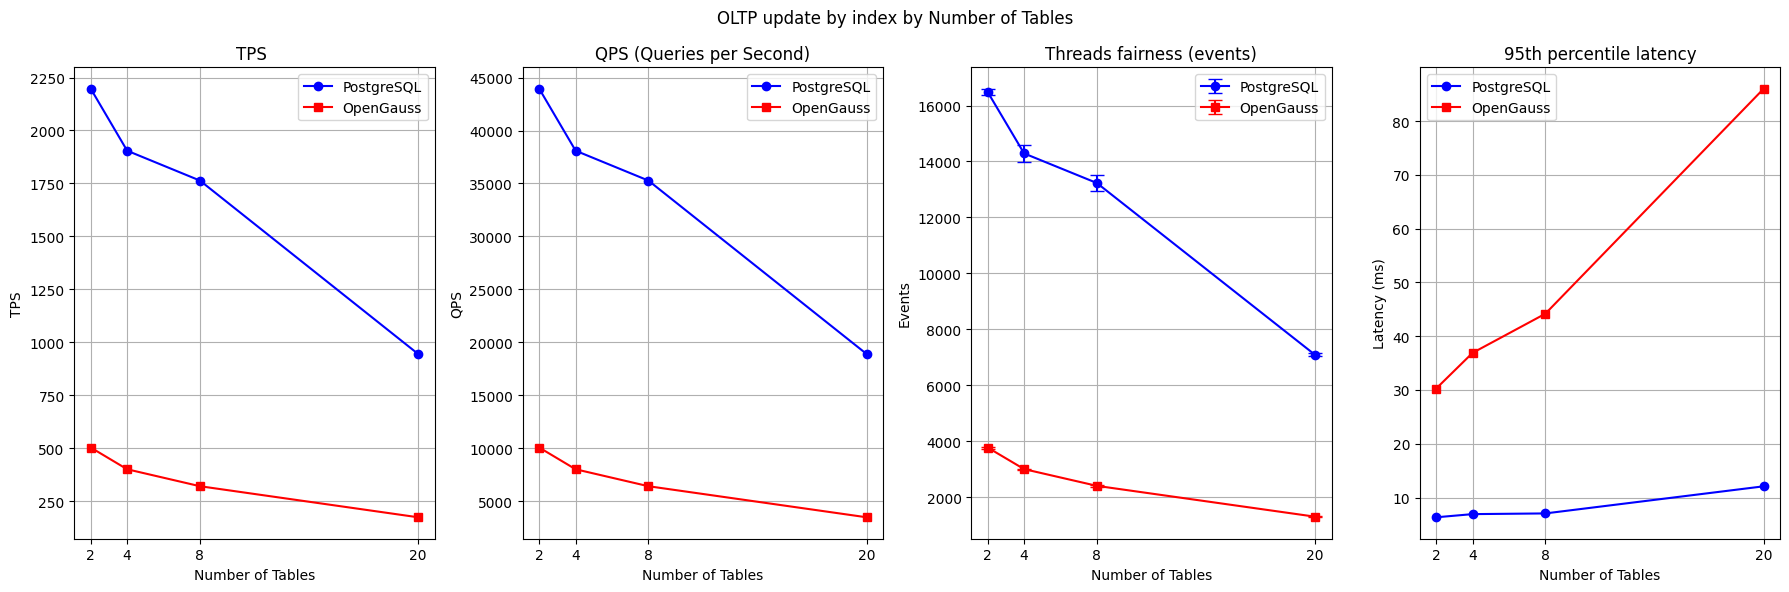

In [50]:
tables = [2, 4, 8, 20]
postgresql_tps = [2197.00,1904.49,1763.56,944.42 ]
postgresql_qps = [43941.88 ,38091.59,35271.84,18888.46]
postgresql_95latency = [6.32,6.91,7.04,12.08]
postgresql_threads_events = [16480.6250,14288.0000,13229.7500,7085.3750]
postgresql_threads_events_stddev = [118.01,318.35,300.38,51.42]


opengauss_tps = [502.91 ,400.41 ,320.43,173.66]
opengauss_qps = [10058.52,8008.24,6408.56 ,3473.16]
opengauss_95latency = [30.26,36.89,44.17,86.00]
opengauss_threads_events = [3774.1250,3004.6250,2405.7500,1303.3750]
opengauss_threads_events_stddev = [36.33,21.38,23.12,21.17]

# 创建一个图形对象，并设置大小
plt.figure(figsize=(18, 6))
plt.suptitle('OLTP update by index by Number of Tables')

# 第一个子图：TPS
plt.subplot(1, 4, 1)
plt.errorbar(tables, postgresql_tps, marker='o', label='PostgreSQL', color='b', capsize=5)
plt.errorbar(tables, opengauss_tps, marker='s', label='OpenGauss', color='r', capsize=5)
plt.title('TPS ')
plt.xlabel('Number of Tables')
plt.ylabel('TPS')
plt.legend()
plt.grid(True)
plt.xticks(tables)

# 第二个子图：QPS
plt.subplot(1, 4, 2)
plt.plot(tables, postgresql_qps, marker='o', label='PostgreSQL', color='b')
plt.plot(tables, opengauss_qps, marker='s', label='OpenGauss', color='r')
plt.title('QPS (Queries per Second)')
plt.xlabel('Number of Tables')
plt.ylabel('QPS')
plt.legend()
plt.grid(True)
plt.xticks(tables)

# 第三个子图：Threads fairness (events)
plt.subplot(1, 4, 3)
plt.errorbar(tables, postgresql_threads_events, yerr=postgresql_threads_events_stddev, marker='o', label='PostgreSQL', color='b', capsize=5)
plt.errorbar(tables, opengauss_threads_events, yerr=opengauss_threads_events_stddev, marker='s', label='OpenGauss', color='r', capsize=5)
plt.title('Threads fairness (events)')
plt.xlabel('Number of Tables')
plt.ylabel('Events')
plt.legend()
plt.grid(True)
plt.xticks(tables)

# 第四个子图：95th percentile latency
plt.subplot(1, 4, 4)
plt.plot(tables, postgresql_95latency, marker='o', label='PostgreSQL', color='b')
plt.plot(tables, opengauss_95latency, marker='s', label='OpenGauss', color='r')
plt.title('95th percentile latency')
plt.xlabel('Number of Tables')
plt.ylabel('Latency (ms)')
plt.legend()
plt.grid(True)
plt.xticks(tables)


# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()

## Select random points ranges 

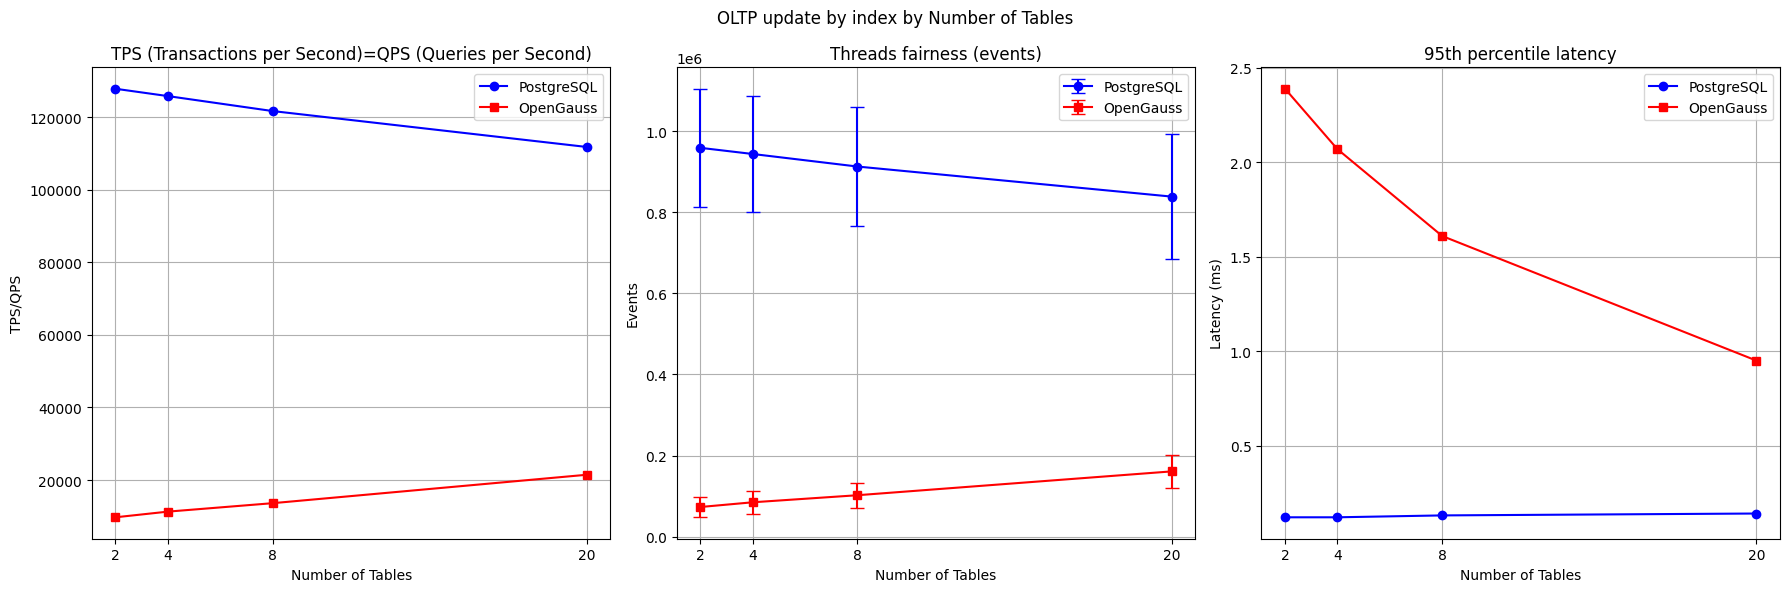

In [51]:
tables = [2, 4, 8, 20]
postgresql_tps = [127808.10,125788.99 ,121664.90 ,111767.96]
postgresql_qps = []
postgresql_95latency = [0.12,0.12,0.13,0.14]
postgresql_threads_events = [958793.6250,943598.3750,912668.2500,838530.8750]
postgresql_threads_events_stddev = [145621.24,143452.81,146939.45,153314.23]


opengauss_tps = [9740.71,11301.78,13627.58 ,21461.89]
opengauss_qps = []
opengauss_95latency = [2.39,2.07,1.61,0.95]
opengauss_threads_events = [73187.8750,84827.1250, 102249.7500,161005.1250]
opengauss_threads_events_stddev = [25353.41,28690.48,30342.70,41079.34]

# 创建一个图形对象，并设置大小
plt.figure(figsize=(18, 6))
plt.suptitle('OLTP update by index by Number of Tables')

# 第一个子图：TPS
plt.subplot(1, 3, 1)
plt.errorbar(tables, postgresql_tps, marker='o', label='PostgreSQL', color='b', capsize=5)
plt.errorbar(tables, opengauss_tps, marker='s', label='OpenGauss', color='r', capsize=5)
plt.title('TPS (Transactions per Second)=QPS (Queries per Second)')
plt.xlabel('Number of Tables')
plt.ylabel('TPS/QPS')
plt.legend()
plt.grid(True)
plt.xticks(tables)

# # 第二个子图：QPS
# plt.subplot(1, 4, 2)
# plt.plot(tables, postgresql_qps, marker='o', label='PostgreSQL', color='b')
# plt.plot(tables, opengauss_qps, marker='s', label='OpenGauss', color='r')
# plt.title('QPS (Queries per Second)')
# plt.xlabel('Number of Tables')
# plt.ylabel('QPS')
# plt.legend()
# plt.grid(True)
# plt.xticks(tables)

# 第三个子图：Threads fairness (events)
plt.subplot(1, 3, 2)
plt.errorbar(tables, postgresql_threads_events, yerr=postgresql_threads_events_stddev, marker='o', label='PostgreSQL', color='b', capsize=5)
plt.errorbar(tables, opengauss_threads_events, yerr=opengauss_threads_events_stddev, marker='s', label='OpenGauss', color='r', capsize=5)
plt.title('Threads fairness (events)')
plt.xlabel('Number of Tables')
plt.ylabel('Events')
plt.legend()
plt.grid(True)
plt.xticks(tables)

# 第四个子图：95th percentile latency
plt.subplot(1, 3, 3)
plt.plot(tables, postgresql_95latency, marker='o', label='PostgreSQL', color='b')
plt.plot(tables, opengauss_95latency, marker='s', label='OpenGauss', color='r')
plt.title('95th percentile latency')
plt.xlabel('Number of Tables')
plt.ylabel('Latency (ms)')
plt.legend()
plt.grid(True)
plt.xticks(tables)


# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()

## Select random ranges

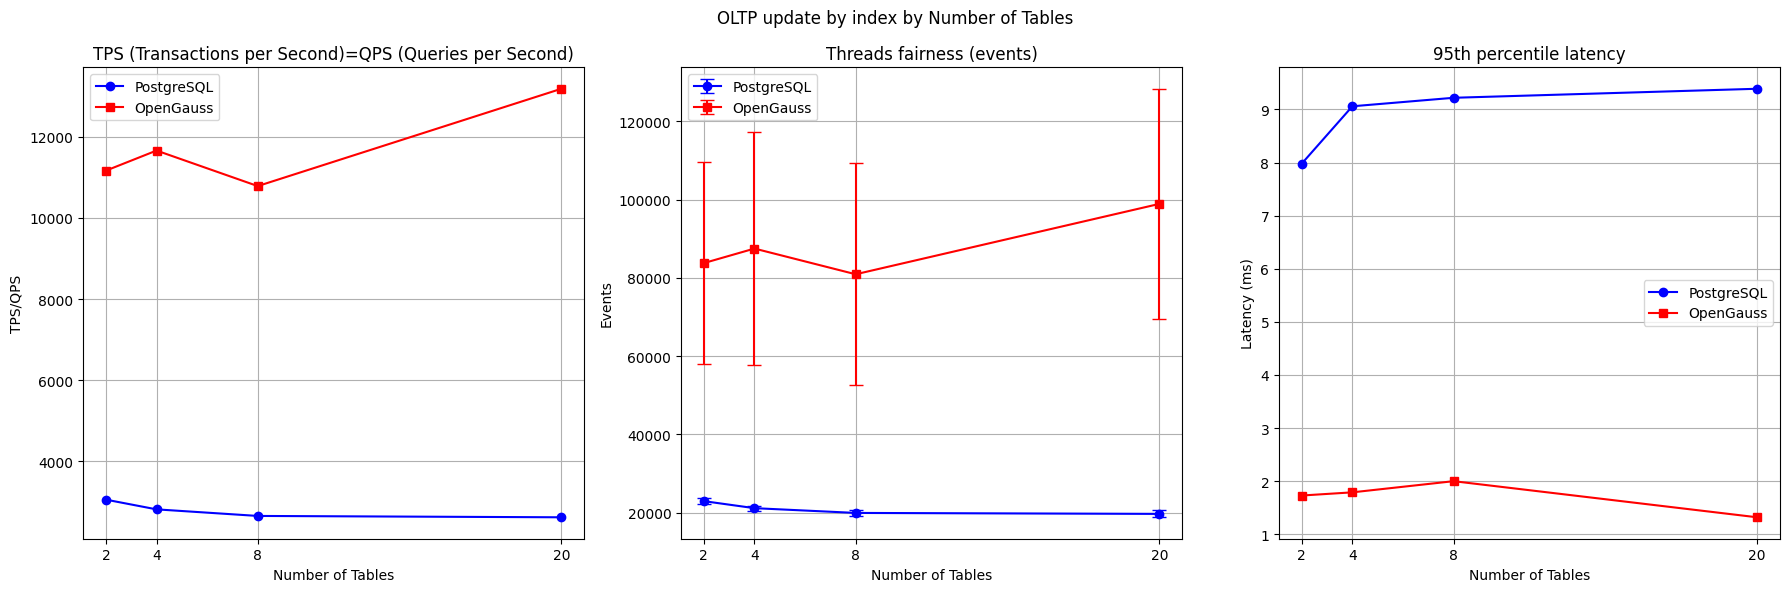

In [52]:
tables = [2, 4, 8, 20]
postgresql_tps = [3054.25,2814.72 ,2652.45,2619.05]
postgresql_qps = []
postgresql_95latency = [7.98,9.06,9.22,9.39]
postgresql_threads_events = [22910.6250,21115.0000,19897.7500,19651.0000]
postgresql_threads_events_stddev = [702.76,644.76,729.36,870.22]


opengauss_tps = [11165.62,11660.58 ,10784.77,13184.10  ]
opengauss_qps = []
opengauss_95latency = [1.73,1.79,2.00,1.32]
opengauss_threads_events = [83767.8750,87482.3750,80911.2500,98899.3750]
opengauss_threads_events_stddev = [25738.65,29776.95,28351.81,29436.34]

# 创建一个图形对象，并设置大小
plt.figure(figsize=(18, 6))
plt.suptitle('OLTP update by index by Number of Tables')

# 第一个子图：TPS
plt.subplot(1, 3, 1)
plt.errorbar(tables, postgresql_tps, marker='o', label='PostgreSQL', color='b', capsize=5)
plt.errorbar(tables, opengauss_tps, marker='s', label='OpenGauss', color='r', capsize=5)
plt.title('TPS (Transactions per Second)=QPS (Queries per Second)')
plt.xlabel('Number of Tables')
plt.ylabel('TPS/QPS')
plt.legend()
plt.grid(True)
plt.xticks(tables)

# # 第二个子图：QPS
# plt.subplot(1, 4, 2)
# plt.plot(tables, postgresql_qps, marker='o', label='PostgreSQL', color='b')
# plt.plot(tables, opengauss_qps, marker='s', label='OpenGauss', color='r')
# plt.title('QPS (Queries per Second)')
# plt.xlabel('Number of Tables')
# plt.ylabel('QPS')
# plt.legend()
# plt.grid(True)
# plt.xticks(tables)

# 第三个子图：Threads fairness (events)
plt.subplot(1, 3, 2)
plt.errorbar(tables, postgresql_threads_events, yerr=postgresql_threads_events_stddev, marker='o', label='PostgreSQL', color='b', capsize=5)
plt.errorbar(tables, opengauss_threads_events, yerr=opengauss_threads_events_stddev, marker='s', label='OpenGauss', color='r', capsize=5)
plt.title('Threads fairness (events)')
plt.xlabel('Number of Tables')
plt.ylabel('Events')
plt.legend()
plt.grid(True)
plt.xticks(tables)

# 第四个子图：95th percentile latency
plt.subplot(1, 3, 3)
plt.plot(tables, postgresql_95latency, marker='o', label='PostgreSQL', color='b')
plt.plot(tables, opengauss_95latency, marker='s', label='OpenGauss', color='r')
plt.title('95th percentile latency')
plt.xlabel('Number of Tables')
plt.ylabel('Latency (ms)')
plt.legend()
plt.grid(True)
plt.xticks(tables)


# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()

## 长时间性能压力测试

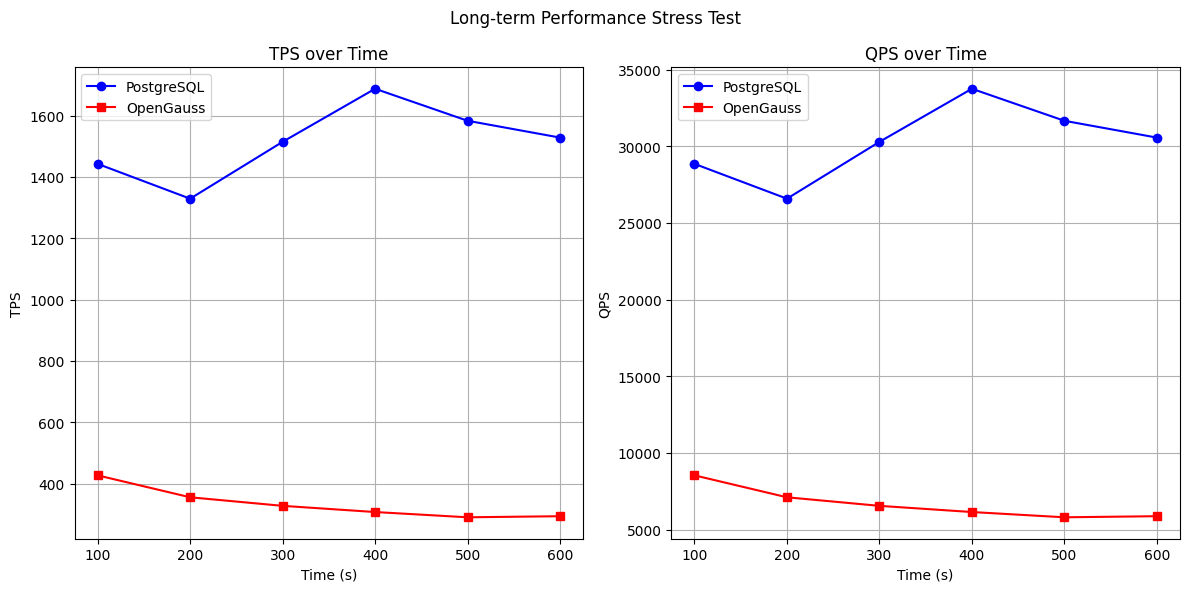

In [53]:
time=[100,200,300,400,500,600]
postgresql_tps_time=[1442.69,1329.13 ,1514.55,1687.60,1583.22, 1528.35]
postgresql_qps_time=[28855.86,26584.08,30291.37,33753.93,31664.96,30568.42]

opengauss_tps_time=[426.91,355.45,327.53,307.35,290.19,293.73]
opengauss_qps_time=[8539.48,7108.96,6550.36 ,6147.15,5803.82 ,5874.91]
# 创建一个图形对象，并设置大小
plt.figure(figsize=(12, 6))
plt.suptitle('Long-term Performance Stress Test')

# 第一个子图：TPS over time
plt.subplot(1, 2, 1)
plt.plot(time, postgresql_tps_time, marker='o', label='PostgreSQL', color='b')
plt.plot(time, opengauss_tps_time, marker='s', label='OpenGauss', color='r')
plt.title('TPS over Time')
plt.xlabel('Time (s)')
plt.ylabel('TPS')
plt.legend()
plt.grid(True)
plt.xticks(time)

# 第二个子图：QPS over time
plt.subplot(1, 2, 2)
plt.plot(time, postgresql_qps_time, marker='o', label='PostgreSQL', color='b')
plt.plot(time, opengauss_qps_time, marker='s', label='OpenGauss', color='r')
plt.title('QPS over Time')
plt.xlabel('Time (s)')
plt.ylabel('QPS')
plt.legend()
plt.grid(True)
plt.xticks(time)

# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()